In [10]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# 현재경로 확인

os.getcwd()

'C:\\Study\\Python_Study\\ByteDegree_MachineLearning'

In [3]:
# 데이터 불러오기

boston = pd.read_csv("./data/Boston_house.csv")

In [5]:
# target 제외한 데이터만 뽑기

boston_data = boston.drop(['Target'], axis = 1)

# 타겟 데이터
### 1978 보스턴 주택 가격
### 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)  

## 특징데이터
* CRIM : 범죄율
* INDUS : 비소매상업지역 면적 비율
* NOX : 일산화질소 농도
* RM : 주택당 방 수
* LSTAT : 인구 중 하위 계층 비율
* B : 인구 중 흑인 비율
* PTRATIO : 학생/교사 비율
* ZN : 25,000 평방피트를 초과 거주지역 비율
* CHAS : 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE : 1940년 이전에 건축된 주택의 비율
* RAD : 방사형 고속도로까지의 거리
* DIS : 직업센터의 거리
* TAX : 재산세율

In [6]:
# 변수 설정 target/crim/rm/lstat

target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

In [7]:
# crim 변수에 상수항추가하기
# 회귀분석을 할 때는 항상 상수항부터 추가해 주고 시작하기!

crim1 = sm.add_constant(crim, has_constant = 'add')

In [8]:
# Ordinary Least Squares(OLS, 최소자승법=최소제곱법) 회귀분석
# sm.OLS 적합시키기

model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()

In [9]:
# predict 함수를 통해 y_hat 구하기

pred1 = fitted_model1.predict(crim1)

In [11]:
# 상수항 추가

rm1 = sm.add_constant(rm, has_constant = 'add')
lstat1 = sm.add_constant(crim, has_constant = 'add')

In [12]:
# Ordinary Least Squares(OLS, 최소자승법=최소제곱법) 회귀분석
# 회귀모델 적합

model2 = sm.OLS(target, rm1)
fitted_model2 = model2.fit()

model3 = sm.OLS(target, lstat1)
fitted_model3 = model3.fit()

In [13]:
# 각각 y_hat 예측하기

pred2 = fitted_model2.predict(rm1)
pred3 = fitted_model3.predict(lstat1)

# 다중 선형 회귀 분석  

* crim, rm, lstat 세개의 변수를 통해 다중회귀접합

In [31]:
# boston data 에서 crim,rm, lstat 변수만 뽑아오기

x_data = boston[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [34]:
# 상수항 추가

x_data1 = sm.add_constant(x_data, has_constant = 'add')
x_data1.head()

,const,CRIM,RM,LSTAT
0,1.0,0.00632,6.575,4.98
1,1.0,0.02731,6.421,9.14
2,1.0,0.02729,7.185,4.03
3,1.0,0.03237,6.998,2.94
4,1.0,0.06905,7.147,5.33


In [35]:
# # Ordinary Least Squares(OLS, 최소자승법=최소제곱법) 회귀분석

multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [36]:
# summary 함수통해 결과 출력

fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.01e-112
Time:                        10:51:46   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 단순 선형 모델의 회귀계수와 비교

In [37]:
# 단순선형회귀모델의 회귀 계수
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    24.033106
CRIM     -0.415190
dtype: float64


In [38]:
# 다중선형회귀모델의 회귀 계수
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


# 행렬연산을 통해 beta 구하기

In [45]:
# 행렬연산을 통해 beta 구하기 (X'X)-1 * X'v
# 위에서 적용한 params 와 값이 일치한다.

from numpy import linalg

# X 의 transpose 는 X.T 이다
ba = linalg.inv(np.dot(x_data1.T, x_data1))
np.dot(np.dot(ba, x_data1.T), target)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [46]:
# y_hat 구하기

pred4 = fitted_multi_model.predict(x_data1)

# residual plot

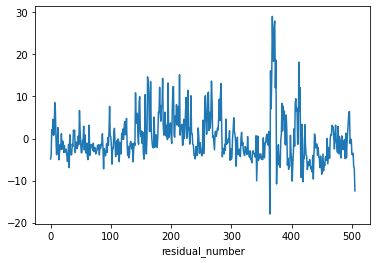

In [47]:
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

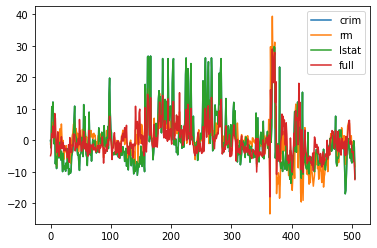

In [48]:
# 그래프를 통해 full 모델이 잔자가 가장 작은걸 알수 있다.

fitted_model1.resid.plot(label = "crim")
fitted_model2.resid.plot(label = "rm")
fitted_model3.resid.plot(label = "lstat")
fitted_multi_model.resid.plot(label = "full")
plt.legend()